# Image 
## Encryption: Encrypt the image

    * Load the input grayscale image using an image processing library like OpenCV.
    * Generate a random key matrix of the same size as the input image. Each element in the key matrix should be a random integer between 0 and 255.
    * Perform element-wise addition of the input image and the key matrix.
    * Take the modulo 256 of each sum to ensure the result stays within the 0-255 range.
    * The resulting matrix represents the encrypted image.

## Decryption: Decrypt the Image

    * Perform element-wise subtraction of the encrypted image and the key matrix.
    * Take the modulo 256 of each difference to ensure the result stays within the 0-255 range.
    * The resulting matrix represents the decrypted image.
    * Display the original input image, the encrypted image, and the decrypted image for comparison.
    * Verify that the decrypted image matches the original input image, confirming the correctness of the encryption and decryption process.

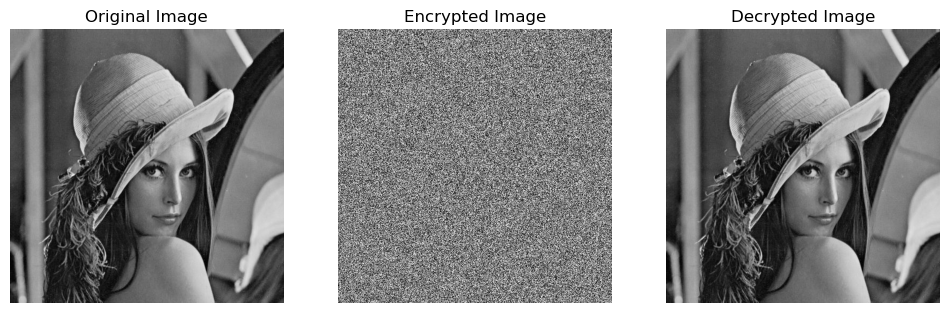

Decryption successful! The decrypted image matches the original.


In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def encryption(img):
    """ Encrypts the image by adding a random key matrix and taking modulo 256."""
    # Generate a random key matrix of the same size
    key = np.random.randint(0, 256, img.shape, dtype=np.uint8)
    
    # Encrypt the image using element-wise addition and modulo 256
    encrypted_img = ((img.astype(np.uint16) + key.astype(np.uint16)) % 256).astype(np.uint8)
   
    return encrypted_img, key

def decryption(encrypted_img, key):
    """ Decrypts the image by subtracting the key matrix and taking modulo 256."""
    # Decrypt the image using element-wise subtraction and modulo 256
    decrypted_img = ((encrypted_img.astype(np.uint16) - key.astype(np.uint16)) % 256).astype(np.uint8)
    
    return decrypted_img

def main():
    # read grayscale image
    img = cv2.imread(f"../test_imgs/lena.jpg", cv2.IMREAD_GRAYSCALE)
    
    if img is None:
        print("Error: image not found.")
        return
        
    encryp_img, key = encryption(img)

    decryp_img = decryption(encryp_img, key)
    
    # Display images
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(img, cmap='gray')
    plt.axis("off")
    
    plt.subplot(1, 3, 2)
    plt.title("Encrypted Image")
    plt.imshow(encryp_img, cmap='gray')
    plt.axis("off")
    
    plt.subplot(1, 3, 3)
    plt.title("Decrypted Image")
    plt.imshow(decryp_img, cmap='gray')
    plt.axis("off")

    plt.savefig("outimg_problem3.png")
    plt.show()
    
    # Verify correctness
    if np.array_equal(img, decryp_img):
        print("Decryption successful! The decrypted image matches the original.")
    else:
        print("Decryption failed! The images do not match.")
        
if __name__ == "__main__":
    main()